In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [0]:
df1=pd.read_excel("/content/velachery_timeseries_Pm2.5.xlsx")

In [0]:
df=df1.copy()

In [5]:
df.columns

Index(['From Date', 'To Date', 'PM2.5'], dtype='object')

In [6]:
df.head()

,From Date,To Date,PM2.5
0,2017-01-01 00:00:00,2017-01-01 01:00:00,26.97
1,2017-01-01 01:00:00,2017-01-01 02:00:00,34.88
2,2017-01-01 02:00:00,2017-01-01 03:00:00,57.49
3,2017-01-01 03:00:00,2017-01-01 04:00:00,62.75
4,2017-01-01 04:00:00,2017-01-01 05:00:00,67.49


In [7]:
df.drop(['To Date'],1,inplace=True)


df['From Date']=pd.to_datetime(df['From Date'])


for i in df.columns:
    for j in df[i]:
        if(j=='None'):
            df[i]=df[i].replace(j,np.nan) 


df=df.dropna(axis=0, subset=['PM2.5'])
df.isna().sum()

From Date      0
PM2.5        582
dtype: int64

In [94]:
df.isna().sum()

From Date    0
PM2.5        0
dtype: int64

In [0]:
for col in df:
    df[col] = df[col].interpolate(method='nearest',limit_direction = 'both')

In [9]:
df['From Date']=pd.to_datetime(df['From Date'])

df.set_index(df['From Date'],inplace=True)

df5 = pd.Series(df['PM2.5'])

df5.head()

From Date
2017-01-01 00:00:00    26.97
2017-01-01 01:00:00    34.88
2017-01-01 02:00:00    57.49
2017-01-01 03:00:00    62.75
2017-01-01 04:00:00    67.49
Name: PM2.5, dtype: float64

In [0]:
#df5[0:]=df5[0:].astype(float)

Text(0.5, 0, 'Year')

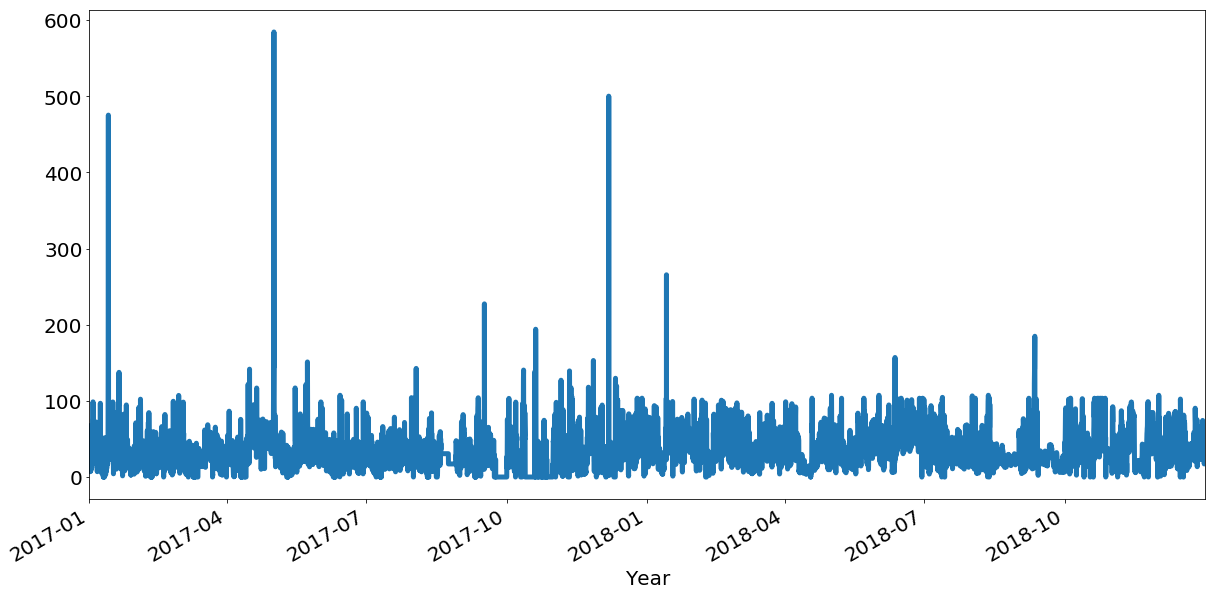

In [11]:
df5.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [12]:
adf = adfuller(df5) 
print ('Test Statistic: ', adf[0])
print ('pvalue: ', adf[1])

Test Statistic:  -8.335071347070745
pvalue:  3.2891272033464956e-13


# **From the dicky fuller test we infer that P value is less than 0.05. Hence, our data is stationary which is a necessary criteria to go with ARIMA**

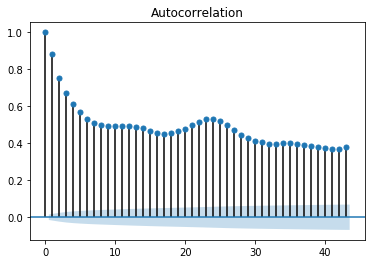

In [39]:
plot_acf(df5);

In [0]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

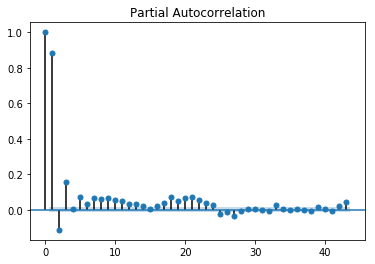

In [40]:
plot_pacf(df5);

In [17]:
df5.head()

From Date
2017-01-01 00:00:00    26.97
2017-01-01 01:00:00    34.88
2017-01-01 02:00:00    57.49
2017-01-01 03:00:00    62.75
2017-01-01 04:00:00    67.49
Name: PM2.5, dtype: float64

In [53]:
df5_ar = ARIMA(df5, order=(1,0,2))
df5_arma = df5_ar.fit(disp=0)

print(df5_arma.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  PM2.5   No. Observations:                17520
Model:                     ARMA(1, 2)   Log Likelihood              -67364.665
Method:                       css-mle   S.D. of innovations             11.314
Date:                Sun, 22 Sep 2019   AIC                         134739.329
Time:                        08:20:31   BIC                         134778.185
Sample:                             0   HQIC                        134752.124
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.1806      0.794     44.331      0.000      33.625      36.736
ar.L1.PM2.5     0.9034      0.005    198.666      0.000       0.895       0.912
ma.L1.PM2.5     0.0869      0.010      9.053    

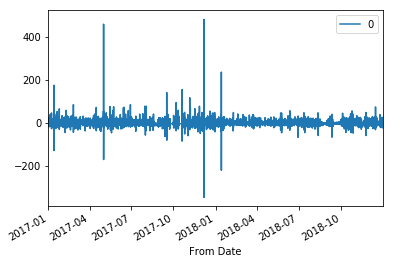

In [54]:
resids = pd.DataFrame(df5_arma.resid)

resids.plot();

                  0
count  17520.000000
mean       0.000190
std       11.314380
min     -346.163599
25%       -3.944480
50%       -1.058855
75%        3.528384
max      481.417466


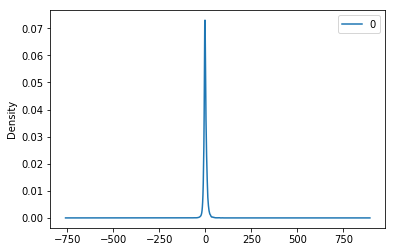

In [55]:
print(resids.describe())

resids.plot(kind='kde')

In [56]:
colnames = ['obs', 'est']
data = pd.DataFrame(columns = colnames)

for t in range(1, len(df5)):
    obs = df5[t].item()
    est = df5_arma.predict(start=t, end=t).item()
    dfrow = pd.DataFrame({'obs':obs, 'est':est}, index=[t])
    data = data.append(dfrow)

print(data.head())
print(data.tail())

     obs        est
1  34.88  27.940190
2  57.49  35.683797
3  62.75  55.814028
4  67.49  56.666353
5  54.08  63.992358
         obs        est
17515  34.07  35.921219
17516  33.35  33.973682
17517  33.80  33.824096
17518  35.17  34.049656
17519  34.86  35.272971


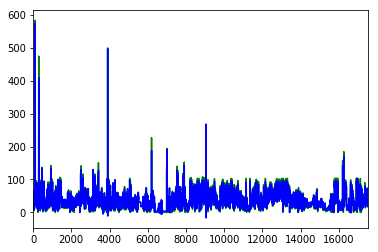

In [57]:
data.obs.plot(color='green')
data.est.plot(color='blue')

In [93]:
df5_arma.forecast(steps=24)[0]

array([34.64231973, 34.77271681, 34.81210218, 34.84768419, 34.87983013,
       34.90887181, 34.93510901, 34.95881254, 34.98022708, 34.99957367,
       35.017052  , 35.03284249, 35.04710813, 35.05999617, 35.07163964,
       35.08215873, 35.09166202, 35.10024759, 35.10800408, 35.11501154,
       35.12134231, 35.12706173, 35.13222884, 35.13689697])

## **Till now Forecasted for next 24 hours**

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,3)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [60]:
rmse             =   np.sqrt(mean_squared_error(data['obs'], data['est']))
mape             =   MAPE(data['obs'], data['est'])
print(rmse,mape)

11.314209707021854 17.251


In [62]:
df5_arma.forecast(steps=24)[0]

array([34.64231973, 34.77271681, 34.81210218, 34.84768419, 34.87983013,
       34.90887181, 34.93510901, 34.95881254, 34.98022708, 34.99957367,
       35.017052  , 35.03284249, 35.04710813, 35.05999617, 35.07163964,
       35.08215873, 35.09166202, 35.10024759, 35.10800408, 35.11501154,
       35.12134231, 35.12706173, 35.13222884, 35.13689697])

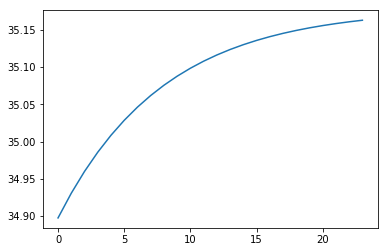

In [28]:
plt.plot(df5_arma.forecast(steps=24)[0])

In [70]:
df6=df5.reset_index(name='PM2.5')
df6.set_index(df6['From Date'],inplace=True)
df6.drop('From Date',1,inplace=True)
df6.head()

,PM2.5
From Date,
2017-01-01 00:00:00,26.97
2017-01-01 01:00:00,34.88
2017-01-01 02:00:00,57.49
2017-01-01 03:00:00,62.75
2017-01-01 04:00:00,67.49


In [0]:
from   statsmodels.tsa.holtwinters     import  ExponentialSmoothing

In [0]:
train                 = df6[0 : int(len(df6) * 0.7)] 
test                  = df6[int(len(df6) * 0.7):]

In [81]:
test.shape

(5256, 1)

In [0]:
y_hat_avg = test.copy()

y_hat_avg['Holt_Winter_M'] = pred1.forecast(len(test))

In [75]:
pred1 = ExponentialSmoothing(np.asarray(train['PM2.5']), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods = 12).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred1.params['smoothing_level'], 4)
beta_value  = np.round(pred1.params['smoothing_slope'], 4)
gamma_value = np.round(pred1.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)

print('Initial Level: ', np.round(pred1.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred1.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred1.params['initial_seasons'], 4))
print('')



y_pred1 =  pred1.forecast(steps = 5256)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['PM2.5']})
print(df_pred1)


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.9552
Smoothing Slope:  0.0
Smoothing Seasonal:  0.0435
Initial Level:  32.4387
Initial Slope:  0.0
Initial Seasons:  [ 3.9679 -1.4478  0.0422 -5.4589 15.0145 17.6856 26.4126 31.8677 42.1151
 41.7333 30.8056 17.6346]

                         Y_hat      Y
From Date                            
2018-05-27 00:00:00  36.657134  33.23
2018-05-27 01:00:00  36.928017  30.89
2018-05-27 02:00:00  34.823469  32.51
2018-05-27 03:00:00  36.120638  34.14
2018-05-27 04:00:00  37.067520  36.68
2018-05-27 05:00:00  38.845302  39.22
2018-05-27 06:00:00  40.320770  38.20
2018-05-27 07:00:00  39.706754  37.19
2018-05-27 08:00:00  36.522372  43.95
2018-05-27 09:00:00  37.133884  50.70
2018-05-27 10:00:00  35.520530  58.47
2018-05-27 11:00:00  35.819685  66.28
2018-05-27 12:00:00  36.657133  63.92
2018-05-27 13:00:00  36.928017  61.57
2018-05-27 14:00:00  34.823469  66.40
2018-05-27 15:00:00  36.120637  71.22
2018-05-27 16:00:00  37.067

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


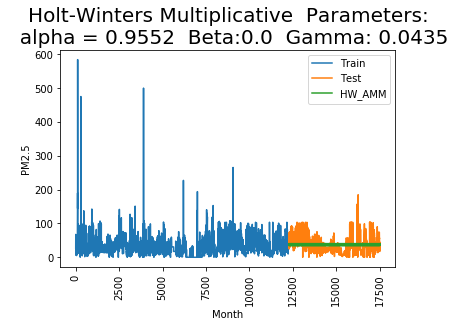

In [87]:
plt.plot(train['PM2.5'].values,                                                           label ='Train')
plt.plot([None for i in train.values] + [x for x in test['PM2.5'].values],                label  ='Test')
plt.plot([None for i in train.values] + [x for x in y_hat_avg['Holt_Winter_M'].values], label  = 'HW_AMM')

plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + str(alpha_value) + '  Beta:' + \
          str(beta_value) + '  Gamma: ' + str(gamma_value), family = 'Arial', fontsize = 20)
plt.ylabel('PM2.5')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.legend(loc='best')
plt.show()

In [0]:
rmse             =  np.sqrt(mean_squared_error(test['PM2.5'], y_hat_avg['Holt_Winter_M']))
mape             =  MAPE(test['PM2.5'], y_hat_avg['Holt_Winter_M'])


In [89]:
print(rmse)
print(mape)

24.131437079333892
47.539


Arima seems to be the Best

In [5]:
import datetime
lis=[]
x = datetime.datetime(2019, 1, 1)

for i in range(1,720):
    x=x+datetime.timedelta(hours=1)
    lis.append(x.strftime("%d-%m-%Y %H:%M:%S"))

In [10]:
import pandas as pd

In [12]:
date=pd.DataFrame(lis)

In [13]:
date.to_csv("D:/greatlakes/capstone/2019_date.csv")